In [67]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
import math

### The data is stored inside the 'team' directory

In [2]:
path = '../../team/courses/MSiA400/GrandTeton'

In [3]:
path_real = path + '/Photos-20191020T020916Z-001/Photos/'
path_generated_go = path + '/GO_noGO Data Set_Images/TestGo/'
path_generated_nogo = path + '/GO_noGO Data Set_Images/TestNoGo/'

In [4]:
## A list of files inside the 'path_generated_go' directory:
files_go = list(os.walk(path_generated_go))[0][2]
files_go[:10]

['Img1007.png',
 'Img1008.png',
 'Img1011.png',
 'Img1016.png',
 'Img1026.png',
 'Img103.png',
 'Img1031.png',
 'Img1039.png',
 'Img1047.png',
 'Img105.png']

In [5]:
len(files_go)

3371

### cv2.imread function reads an image as a numpy ndarray

In [6]:
img = cv2.imread(path_generated_go+files_go[0])
print(img)

[[[ 32  32  32]
  [ 55  49  43]
  [ 55  49  43]
  ...
  [ 55  49  43]
  [ 55  49  43]
  [ 32  32  32]]

 [[ 32  32  32]
  [ 98  87  76]
  [112  99  87]
  ...
  [111  98  86]
  [ 97  85  75]
  [ 32  32  32]]

 [[ 32  32  32]
  [100  88  78]
  [114 101  89]
  ...
  [112  99  87]
  [ 98  86  76]
  [ 32  32  32]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


In [7]:
type(img)

numpy.ndarray

In [8]:
img.shape

(206, 531, 3)

#### Images are 3 dimensional arrays. First two dimensions denote the pixel resolution (206x531). The last dimension is for colour depth. In cases where the image is a 2D array then it is generally a Black and White image. 

In [9]:
img.dtype

dtype('uint8')

In [10]:
"""
cv2.imshow('image', img) 
cv2.waitKey(0)
cv2.destroyAllWindows()
"""

"\ncv2.imshow('image', img) \ncv2.waitKey(0)\ncv2.destroyAllWindows()\n"

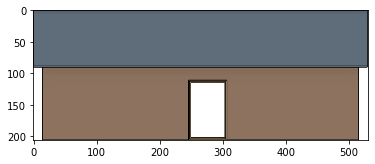

In [11]:
## we can plot the image using matplotlib but the colors are inverted so reverting back using cv2.COLOR_BGR2RGB function.
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

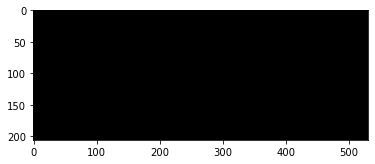

In [12]:
# 0 means black
black_img = np.zeros((206, 531, 3), dtype = 'uint8')
plt.imshow(cv2.cvtColor(black_img, cv2.COLOR_BGR2RGB))
plt.show()

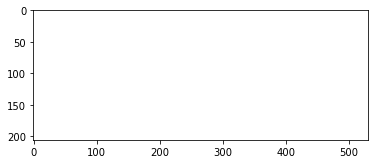

In [13]:
# 255 means white
white_img = 255*np.ones((206, 531, 3), dtype = 'uint8')
plt.imshow(cv2.cvtColor(white_img, cv2.COLOR_BGR2RGB))
plt.show()

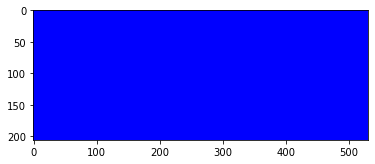

In [14]:
## BGR channels

# First channel Blue
blue_img = np.zeros((206, 531, 3), dtype = 'uint8')
blue_img[:,:,0] = 255*np.ones((206, 531), dtype = 'uint8')

plt.imshow(cv2.cvtColor(blue_img, cv2.COLOR_BGR2RGB))
plt.show()

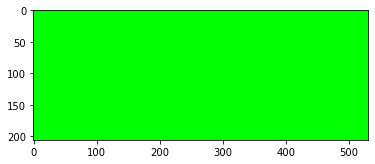

In [15]:
# Second channel Green
green_img = np.zeros((206, 531, 3), dtype = 'uint8')
green_img[:,:,1] = 255*np.ones((206, 531), dtype = 'uint8')

plt.imshow(cv2.cvtColor(green_img, cv2.COLOR_BGR2RGB))
plt.show()

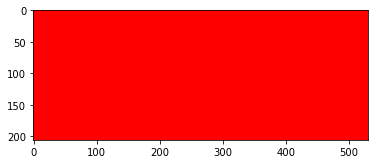

In [16]:
# Third channel Red
red_img = np.zeros((206, 531, 3), dtype = 'uint8')
red_img[:,:,2] = 255*np.ones((206, 531), dtype = 'uint8')

plt.imshow(cv2.cvtColor(red_img, cv2.COLOR_BGR2RGB))
plt.show()

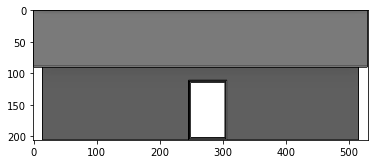

In [17]:
plt.imshow(cv2.cvtColor(img[:,:,0], cv2.COLOR_BGR2RGB))
plt.show()

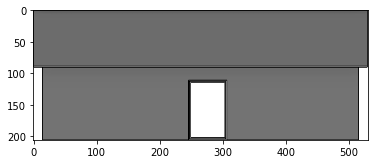

In [18]:
plt.imshow(cv2.cvtColor(img[:,:,1], cv2.COLOR_BGR2RGB))
plt.show()

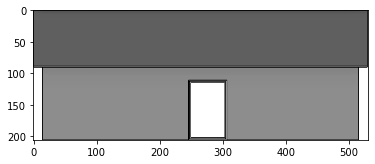

In [19]:
plt.imshow(cv2.cvtColor(img[:,:,2], cv2.COLOR_BGR2RGB))
plt.show()

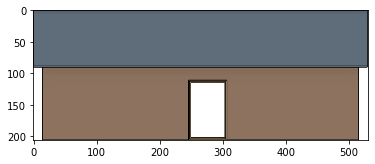

In [20]:
## combined effect
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

## extracting countours

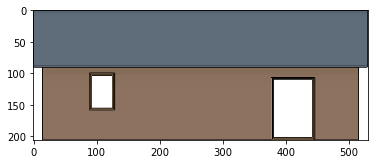

In [22]:
## combined effect
img = test_images[2]
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [23]:
img.shape

(206, 531, 3)

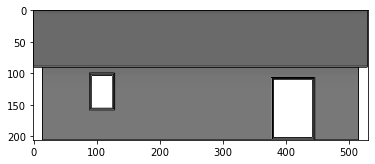

In [24]:
# grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))
plt.show()

In [25]:
gray.shape

(206, 531)

In [26]:
ret, thresh = cv2.threshold(gray, 200, 255, 0)

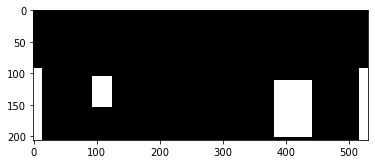

In [27]:
plt.imshow(cv2.cvtColor(thresh, cv2.COLOR_BGR2RGB))
plt.show()

In [28]:
thresh

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [29]:
contours, h = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [30]:
len(contours)

4

In [31]:
for cnt in contours:
    print(cnt.shape)

(4, 1, 2)
(4, 1, 2)
(4, 1, 2)
(4, 1, 2)


In [32]:
contours[3]

array([[[  0,  92]],

       [[  0, 205]],

       [[ 14, 205]],

       [[ 14,  92]]], dtype=int32)

In [33]:
for i in range(len(contours)):
    sides = cv2.approxPolyDP(contours[i],0.01*cv2.arcLength(contours[i],True),True)
    print(i,sides)

0 [[[382 111]]

 [[382 200]]

 [[441 200]]

 [[441 111]]]
1 [[[ 94 105]]

 [[ 94 153]]

 [[124 153]]

 [[124 105]]]
2 [[[516  92]]

 [[516 205]]

 [[530 205]]

 [[530  92]]]
3 [[[  0  92]]

 [[  0 205]]

 [[ 14 205]]

 [[ 14  92]]]


In [34]:
sides[3][0][1]

92

In [35]:
sides[2][0][0]

14

In [36]:
for i in range(len(contours)):
    sides = cv2.approxPolyDP(contours[i],0.01*cv2.arcLength(contours[i],True),True)
    print(i)
    if len(sides)==5:
        print ("hexagon")
    if len(sides)==5:
        print ("pentagon")
    elif len(sides)==3:
        print ("triangle")
    elif len(sides)==4:
        print ("rectangle")
    elif len(sides) == 9:
        print ("half-circle")
    elif len(sides) > 15:
        print ("circle")

0
rectangle
1
rectangle
2
rectangle
3
rectangle


#### if the x value is extreme then we won't take that opening into account

In [40]:
contour_img = cv2.drawContours(255*np.zeros(img.shape, dtype = 'uint8'), contours[1], -1, (0,255,0), 3)

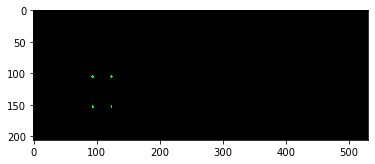

In [41]:
plt.imshow(cv2.cvtColor(contour_img, cv2.COLOR_BGR2RGB))
plt.show()

In [42]:
def count_openings(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    height = gray.shape[0]
    width = gray.shape[1]
    
    ret, thresh = cv2.threshold(gray, 200, 255, 0)
    contours, h = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    
    quadrilaterals = []
    for i in range(len(contours)):
        polygon = cv2.approxPolyDP(contours[i],0.01*cv2.arcLength(contours[i],True),True)
        if len(polygon) == 4:
            quadrilaterals.append(polygon) 
            
    redflag = [0]*len(quadrilaterals)
    
    for i in range(len(quadrilaterals)):
        q = quadrilaterals[i]
        for j in range(4):
            if abs(q[j][0][0] - gray.shape[1]) < 5 or abs(q[j][0][0]) < 5:
                redflag[i] = 1
    
    return (len(quadrilaterals) - np.sum(redflag))

## testing

In [43]:
test_images = []
for i in range(10):
    img = cv2.imread(path_generated_go+files_go[i])
    test_images.append(img)

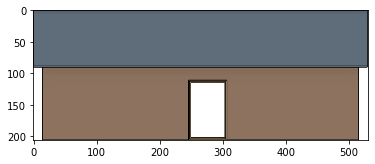

number of openings =  1


In [44]:
plt.imshow(cv2.cvtColor(test_images[0], cv2.COLOR_BGR2RGB))
plt.show()
print("number of openings = ",count_openings(test_images[0]))

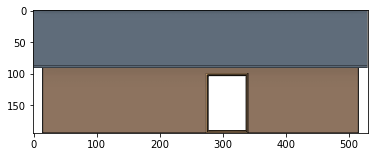

number of openings =  1


In [45]:
plt.imshow(cv2.cvtColor(test_images[1], cv2.COLOR_BGR2RGB))
plt.show()
print("number of openings = ",count_openings(test_images[1]))

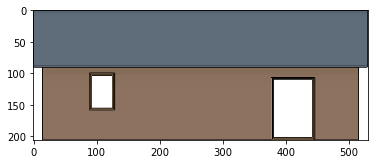

number of openings =  2


In [46]:
plt.imshow(cv2.cvtColor(test_images[2], cv2.COLOR_BGR2RGB))
plt.show()
print("number of openings = ",count_openings(test_images[2]))

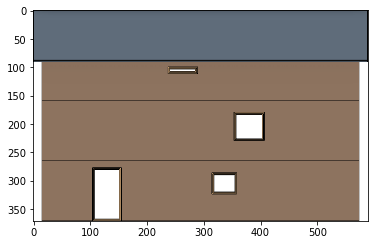

number of openings =  4


In [47]:
plt.imshow(cv2.cvtColor(test_images[3], cv2.COLOR_BGR2RGB))
plt.show()
print("number of openings = ",count_openings(test_images[3]))

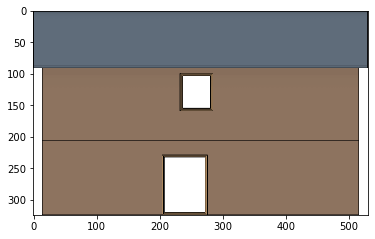

number of openings =  2


In [48]:
plt.imshow(cv2.cvtColor(test_images[4], cv2.COLOR_BGR2RGB))
plt.show()
print("number of openings = ",count_openings(test_images[4]))

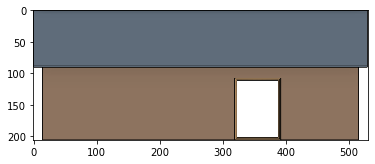

number of openings =  1


In [49]:
plt.imshow(cv2.cvtColor(test_images[5], cv2.COLOR_BGR2RGB))
plt.show()
print("number of openings = ",count_openings(test_images[5]))

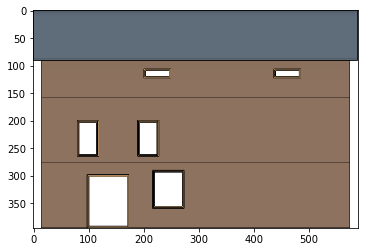

number of openings =  6


In [50]:
plt.imshow(cv2.cvtColor(test_images[6], cv2.COLOR_BGR2RGB))
plt.show()
print("number of openings = ",count_openings(test_images[6]))

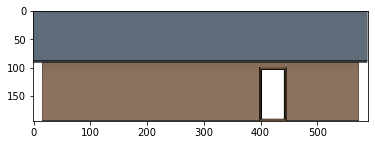

number of openings =  1


In [51]:
plt.imshow(cv2.cvtColor(test_images[7], cv2.COLOR_BGR2RGB))
plt.show()
print("number of openings = ",count_openings(test_images[7]))

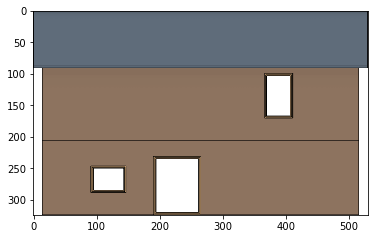

number of openings =  3


In [52]:
plt.imshow(cv2.cvtColor(test_images[8], cv2.COLOR_BGR2RGB))
plt.show()
print("number of openings = ",count_openings(test_images[8]))

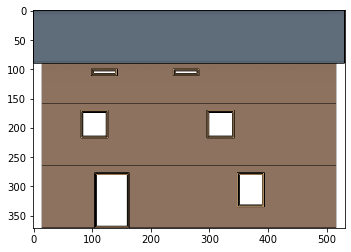

number of openings =  6


In [53]:
plt.imshow(cv2.cvtColor(test_images[9], cv2.COLOR_BGR2RGB))
plt.show()
print("number of openings = ",count_openings(test_images[9]))

## feature 2

In [54]:
def fraction_width(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    height = gray.shape[0]
    width = gray.shape[1]
    
    ret, thresh = cv2.threshold(gray, 200, 255, 0)
    contours, h = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    
    quadrilaterals = []
    for i in range(len(contours)):
        polygon = cv2.approxPolyDP(contours[i],0.01*cv2.arcLength(contours[i],True),True)
        if len(polygon) == 4:
            quadrilaterals.append(polygon) 
            
    redflag = [0]*len(quadrilaterals)
    
    for i in range(len(quadrilaterals)):
        q = quadrilaterals[i]
        for j in range(4):
            if abs(q[j][0][0] - gray.shape[1]) < 5 or abs(q[j][0][0]) < 5:
                redflag[i] = 1
    
    detection_series = np.zeros(gray.shape[1], dtype = 'uint8')
    
    for i in range(len(quadrilaterals)):
        q = quadrilaterals[i]
        if redflag[i]!=1:
            x_min = np.min(q[:,0,0])
            x_max = np.max(q[:,0,0])
            detection_series[x_min:x_max] = np.ones(x_max-x_min, dtype = 'uint8')
    
    return np.sum(detection_series)/gray.shape[1]

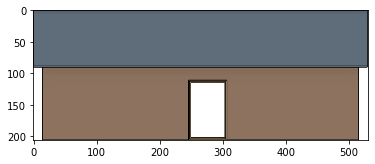

fraction of width =  0.096045197740113


In [55]:
plt.imshow(cv2.cvtColor(test_images[0], cv2.COLOR_BGR2RGB))
plt.show()
print("fraction of width = ",fraction_width(test_images[0]))

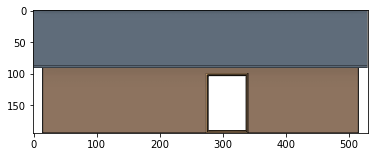

fraction of width =  0.10546139359698682


In [56]:
plt.imshow(cv2.cvtColor(test_images[1], cv2.COLOR_BGR2RGB))
plt.show()
print("fraction of width = ",fraction_width(test_images[1]))

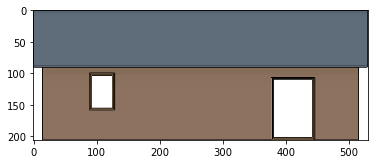

fraction of width =  0.16760828625235405


In [57]:
plt.imshow(cv2.cvtColor(test_images[2], cv2.COLOR_BGR2RGB))
plt.show()
print("fraction of width = ",fraction_width(test_images[2]))

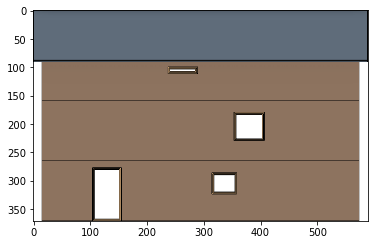

fraction of width =  0.26949152542372884


In [58]:
plt.imshow(cv2.cvtColor(test_images[3], cv2.COLOR_BGR2RGB))
plt.show()
print("fraction of width = ",fraction_width(test_images[3]))

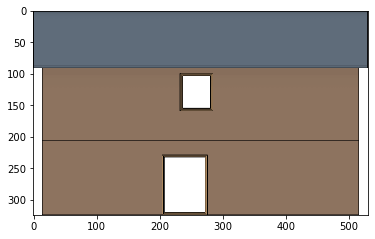

fraction of width =  0.1337099811676083


In [59]:
plt.imshow(cv2.cvtColor(test_images[4], cv2.COLOR_BGR2RGB))
plt.show()
print("fraction of width = ",fraction_width(test_images[4]))

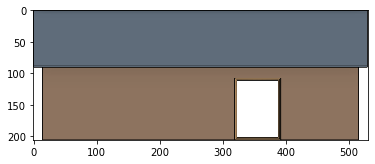

fraction of width =  0.11864406779661017


In [60]:
plt.imshow(cv2.cvtColor(test_images[5], cv2.COLOR_BGR2RGB))
plt.show()
print("fraction of width = ",fraction_width(test_images[5]))

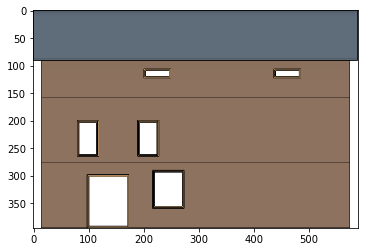

fraction of width =  0.33728813559322035


In [61]:
plt.imshow(cv2.cvtColor(test_images[6], cv2.COLOR_BGR2RGB))
plt.show()
print("fraction of width = ",fraction_width(test_images[6]))

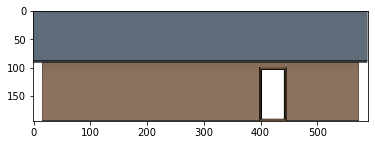

fraction of width =  0.06440677966101695


In [62]:
plt.imshow(cv2.cvtColor(test_images[7], cv2.COLOR_BGR2RGB))
plt.show()
print("fraction of width = ",fraction_width(test_images[7]))

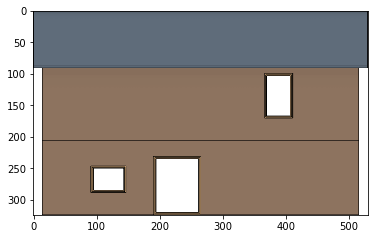

fraction of width =  0.2749529190207156


In [63]:
plt.imshow(cv2.cvtColor(test_images[8], cv2.COLOR_BGR2RGB))
plt.show()
print("fraction of width = ",fraction_width(test_images[8]))

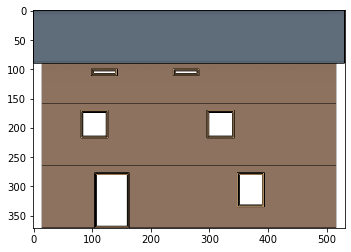

fraction of width =  0.3370998116760829


In [64]:
plt.imshow(cv2.cvtColor(test_images[9], cv2.COLOR_BGR2RGB))
plt.show()
print("fraction of width = ",fraction_width(test_images[9]))

## feature 3

In [105]:
def count_level(img):
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    shape = gray.shape
    width = shape[1]
    edges = cv2.Canny(gray, 80, 120)
    lines = cv2.HoughLinesP(edges, rho = 1, theta = math.pi/2, minLineLength = 0.8*width, threshold = 1, maxLineGap = 3)
    lines = lines.tolist()
#     for i in lines:
#         for j in lines:
#             if j != i and abs(i[0][1]-j[0][1]) < 15:
#                 lines.remove(j)
    flags = [0]*len(lines)
    for i in range(len(lines)):
        for j in range(len(lines)):
            if j < i and (abs(lines[i][0][1]-lines[j][0][1]) < 15):
                flags[j] = 1
        if abs(lines[i][0][1]-0) < 10:
            flags[i] = 1
    counter = 0
    for i in range(len(flags)):
        if flags[i] == 0:
            counter += 1                
    return counter

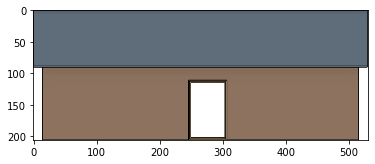

number of levels =  1


In [106]:
plt.imshow(cv2.cvtColor(test_images[0], cv2.COLOR_BGR2RGB))
plt.show()
print("number of levels = ",count_level(test_images[0]))

In [101]:
gray=cv2.cvtColor(test_images[0],cv2.COLOR_BGR2GRAY)
shape = gray.shape
width = shape[1]
edges = cv2.Canny(gray, 80, 120)
lines = cv2.HoughLinesP(edges, rho = 1, theta = math.pi/2, minLineLength = 0.8*width, threshold = 1, maxLineGap = 3)
lines = lines.tolist()
print(lines)

[[[15, 90, 515, 90]], [[2, 92, 528, 92]], [[2, 87, 529, 87]], [[2, 1, 529, 1]]]


In [102]:
flags = [0]*len(lines)
for i in range(len(lines)):
    for j in range(len(lines)):
        if j < i and (abs(lines[i][0][1]-lines[j][0][1]) < 15):
            flags[j] = 1
    if abs(lines[i][0][1]-0) < 10:
        flags[i] = 1
counter = 0
for i in range(len(flags)):
    if flags[i] == 0:
        counter += 1

[1, 1, 0, 1]


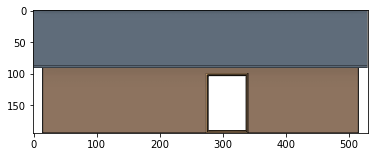

number of levels =  1


In [107]:
plt.imshow(cv2.cvtColor(test_images[1], cv2.COLOR_BGR2RGB))
plt.show()
print("number of levels = ",count_level(test_images[1]))

In [103]:
gray=cv2.cvtColor(test_images[1],cv2.COLOR_BGR2GRAY)
shape = gray.shape
width = shape[1]
edges = cv2.Canny(gray, 80, 120)
lines = cv2.HoughLinesP(edges, rho = 1, theta = math.pi/2, minLineLength = 0.8*width, threshold = 1, maxLineGap = 3)
lines = lines.tolist()
print(lines)

[[[14, 92, 516, 92]], [[0, 87, 530, 87]], [[16, 90, 514, 90]]]


In [104]:
flags = [0]*len(lines)
for i in range(len(lines)):
    for j in range(len(lines)):
        if j < i and (abs(lines[i][0][1]-lines[j][0][1]) < 15):
            flags[j] = 1
    if abs(lines[i][0][1]-0) < 10:
        flags[i] = 1
print(flags)

[1, 1, 0]


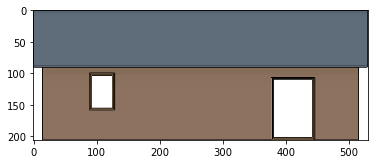

number of levels =  1


In [108]:
plt.imshow(cv2.cvtColor(test_images[2], cv2.COLOR_BGR2RGB))
plt.show()
print("number of levels = ",count_level(test_images[2]))

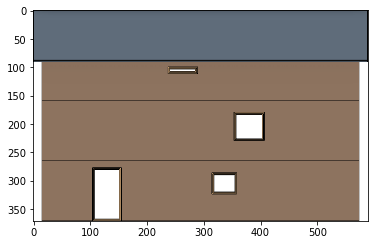

number of levels =  3


In [109]:
plt.imshow(cv2.cvtColor(test_images[3], cv2.COLOR_BGR2RGB))
plt.show()
print("number of levels = ",count_level(test_images[3]))

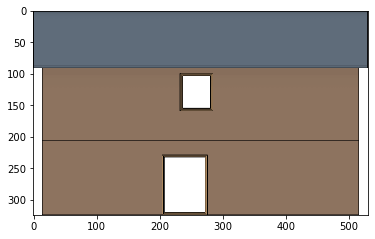

number of levels =  2


In [110]:
plt.imshow(cv2.cvtColor(test_images[4], cv2.COLOR_BGR2RGB))
plt.show()
print("number of levels = ",count_level(test_images[4]))

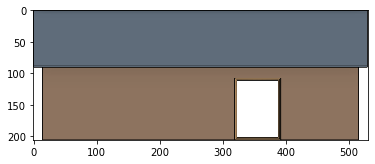

number of levels =  1


In [111]:
plt.imshow(cv2.cvtColor(test_images[5], cv2.COLOR_BGR2RGB))
plt.show()
print("number of levels = ",count_level(test_images[5]))

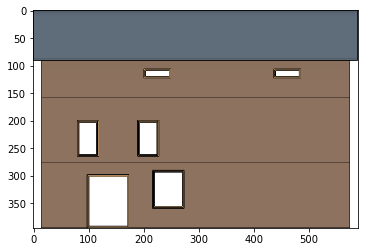

number of levels =  3


In [112]:
plt.imshow(cv2.cvtColor(test_images[6], cv2.COLOR_BGR2RGB))
plt.show()
print("number of levels = ",count_level(test_images[6]))

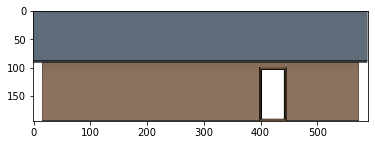

number of levels =  1


In [113]:
plt.imshow(cv2.cvtColor(test_images[7], cv2.COLOR_BGR2RGB))
plt.show()
print("number of levels = ",count_level(test_images[7]))

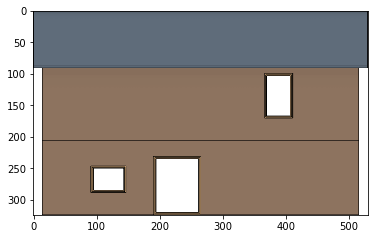

number of levels =  2


In [114]:
plt.imshow(cv2.cvtColor(test_images[8], cv2.COLOR_BGR2RGB))
plt.show()
print("number of levels = ",count_level(test_images[8]))

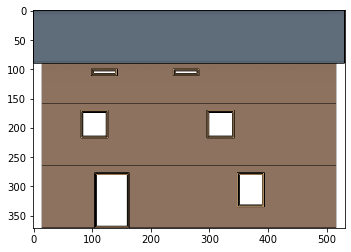

number of levels =  3


In [115]:
plt.imshow(cv2.cvtColor(test_images[9], cv2.COLOR_BGR2RGB))
plt.show()
print("number of levels = ",count_level(test_images[9]))